# Bike Demand Data

## Part I)  A) Load the library

In [4]:
# Import required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Part I) B) Read the data

In [6]:
# Load the data from file or data source

In [7]:
bike_df = pd.read_csv("train.csv")
print('Bike Demand Data')
bike_df

Bike Demand Data


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week 0-monday , 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-Saturday ,6-Sunday 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [8]:
# Show first 5 rows

In [9]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
# Show last 5 rows

In [11]:
bike_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [12]:
# Show the info for data

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
# Check shape and length of data

In [15]:
bike_df.shape , len(bike_df)

((10886, 12), 10886)

In [16]:
# Show the columns

In [17]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
column_list = list(bike_df.columns)
column_list

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [19]:
# psudeo numerical columns
psudeo_numerical_columns = ['season','holiday','workingday','weather']

In [20]:
# Show the description summary for numerical and categorical values.

In [21]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [22]:
bike_df.describe(include='O')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [23]:
bike_df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


## Part II) Exploratory Data Analysis

## Part II) A) Do Numerical Analysis of Columns

### Analysis of temp column

In [24]:
bike_df["temp"].min()

0.82

In [25]:
bike_df["temp"].max()

41.0

In [26]:
bike_df["temp"].mean()

20.23085981995223

In [27]:
bike_df["temp"].median()

20.5

In [28]:
bike_df["temp"].std()

7.791589843987506

In [29]:
bike_df["temp"].var()

60.70887229692925

In [30]:
bike_df["temp"].skew()

0.003690844422472008

#### What is the range where most of the temperature values are lying?

In [31]:
# Histogram plot

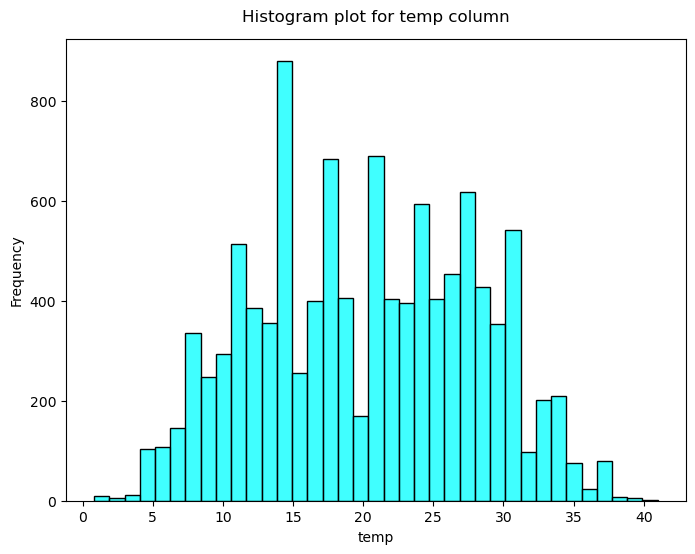

In [32]:
plt.figure(figsize=(8,6)) # (8,6) --("width","height")
sns.histplot(bike_df["temp"],color='cyan')
plt.title("Histogram plot for temp column",y=1.02)
plt.xlabel("temp")
plt.ylabel("Frequency")
plt.show()

In [33]:
# Distribution plot

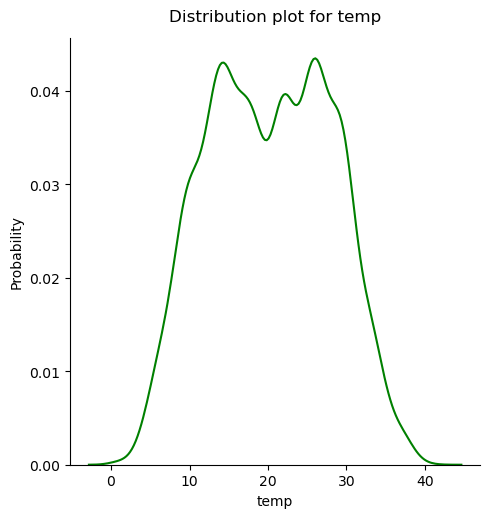

In [34]:
sns.displot(bike_df["temp"],kind="kde",color='green') # kde stands for kernel density estimation
plt.title("Distribution plot for temp",y=1.02)
plt.xlabel("temp")
plt.ylabel("Probability")
plt.show()

In [35]:
## mutimodal graph more than one peak.

#### Are there any extreme temperature points in data?

In [36]:
bike_df["temp"].quantile(0.10),bike_df["temp"].quantile(0.25),bike_df["temp"].quantile(0.50),bike_df["temp"].quantile(0.75),bike_df["temp"].quantile(0.90)

(9.84, 13.94, 20.5, 26.24, 30.34)

In [37]:
# Box plot

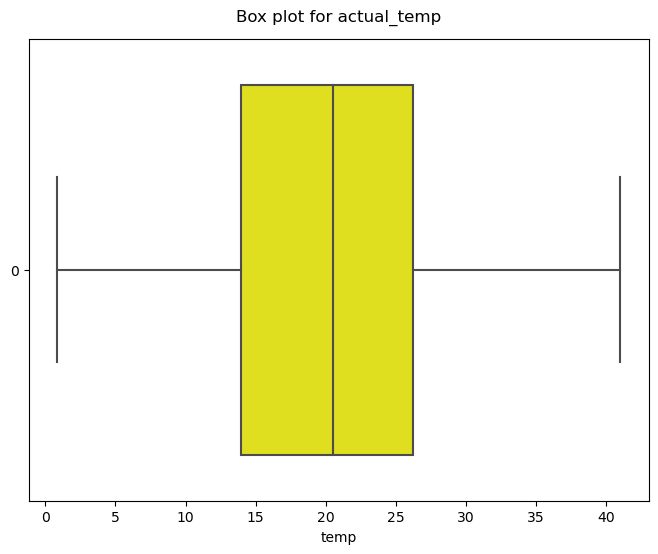

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(bike_df["temp"],orient="h",color='yellow') # orient="h" for horizontal or orient="v" for vertical
plt.title("Box plot for actual_temp",y=1.02)
plt.xlabel("temp")
plt.show()

In [39]:
# Conclusion

**Temp** Column has a symmetrical distribution with skewness -0.003 which is between -0.5 and 0.5 . 
- Density curve for temperature is multimodal as it has two peaks.
- Range of temperature value is from minimum 0.8 degree celsius and maximum 41 degree celsius.
- It's mean value is 20.23 and median value is 20.5.
- Standard deviation for temp column is 7.79 and variance for this column is 60.7.
- Most of the temperature are falling under two groups 8-18 and 21-31.

- 10% of tempearture is 9.84 degree celcius and below.
- 25% of tempearture is 13.94 degree celcius and below.
- 50% of tempearture is 20.5 degree celcius and below.
- 75% of tempearture is 26.24 degree celcius and below.
- 90% of tempearture is 30.34 degree celcius and below.
- temp column has no extreme values.

temp column could be a good predictor for bike count and it's relation with other columns should be explored further.

## Part II) B) Do Categorical  Analysis of Columns

In [40]:
# Count values

In [41]:
bike_df['season'].value_counts().sort_values(ascending=True)

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

In [42]:
# Percentage values

In [43]:
bike_df['season'].value_counts(normalize=True)*100

season
4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: proportion, dtype: float64

In [44]:
# Piechart

In [1]:
plt.figure(figsize=(8,4))
sizes=(2686,2733,2733,2734)
plt.pie(sizes,labels=["Spring", "Summer", " Fall", "Winter"], autopct="%1.2f%%")
plt.legend(loc='right')
plt.show()

NameError: name 'plt' is not defined

In [46]:
# Countplot

<Axes: xlabel='season', ylabel='count'>

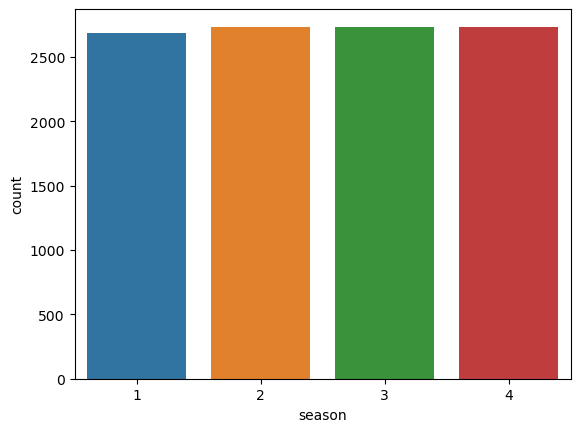

In [47]:
sns.countplot(x=bike_df['season'])

In [48]:
# To find no. of unique values

In [49]:
bike_df["season"].nunique()

4

In [50]:
# To find what are those unique values

In [51]:
bike_df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [52]:
# Word cloud couldn't be created as their are only numeric values, not alphabetic values.

In [53]:
# Conclusion

- From the above data analysis, we can say that the bike demand data contains 4 seasons namely Spring, Summer, Fall and Winter.
- In spring, somewhat less amount of sale took place which is around 24.67% as compared to other 3 seasons as in other seasons 
  25.11% of bike sale took place.  
- This data has low cardinality.

## Part II) C) Combine Numerical and Categorical columns for analysis

In [54]:
# Correlation of numerical and categorical data

In [55]:
data=bike_df[['season','temp']].corr()
data

,season,temp
season,1.000000,0.258689
temp,0.258689,1.000000


In [56]:
# Heatmap

<Axes: >

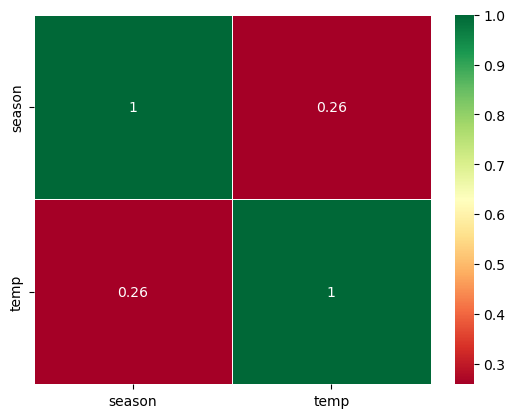

In [57]:
sns.heatmap(data,cmap="RdYlGn", annot=True, linewidth=.5)

In [58]:
# Scatterplot

<Axes: xlabel='season', ylabel='temp'>

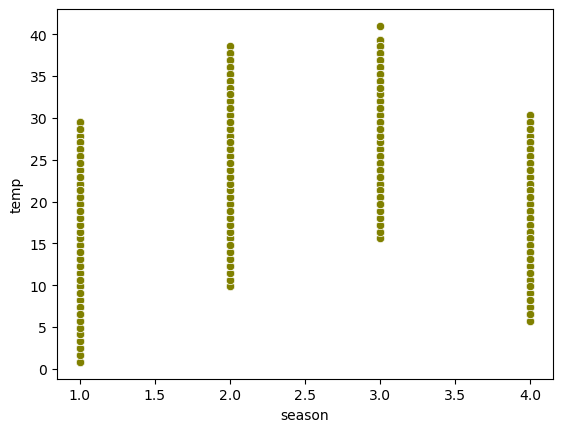

In [59]:
sns.scatterplot(data=bike_df, x='season', y='temp', color='olive')

In [60]:
# Regplot

<Axes: xlabel='season', ylabel='temp'>

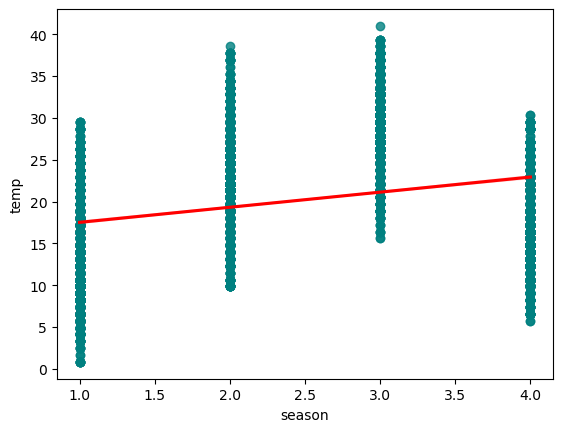

In [61]:
sns.regplot(data=bike_df, x='season', y='temp', scatter_kws={"color":"teal"},line_kws={"color":"red"})

## Part II) D) Add your own Questions

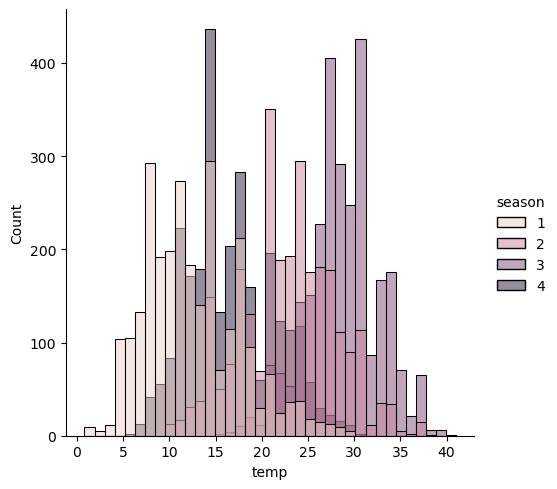

In [62]:
# Q1 How is season related to temparature? / What are the different seasons at different temparuture? 
sns.displot(data=bike_df, x='temp', hue='season')

<Axes: xlabel='registered', ylabel='temp'>

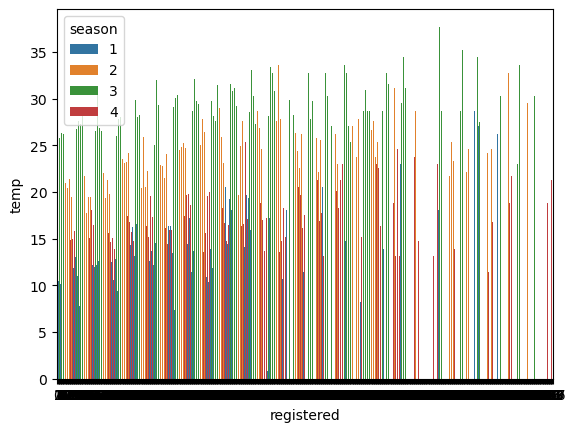

In [63]:
# Q2 What is the average of the temparature that is registered during different seasons?
sns.barplot(data=bike_df, x="registered", y="temp",hue='season',errorbar=None)

<Axes: xlabel='count', ylabel='count'>

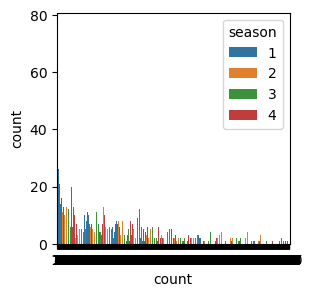

In [64]:
# Q3 What is the count of the total rental bikes during the different seasons?
plt.figure(figsize=(3,3))
sns.countplot(data=bike_df, x='count', hue='season')

# Part III) Data Cleaning

## Part III) A) Handling Duplicate data

In [65]:
## Check shape of original data

In [66]:
bike_df.shape

(10886, 12)

In [67]:
## Drop duplicate values and reset your index columns.

In [68]:
bike_df.drop_duplicates(inplace=True,keep='first')
bike_df.reset_index()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [69]:
## Check shape after applying drop duplicates.

In [70]:
bike_df.shape

(10886, 12)

## Part III) B)  Handling Missing Values

In [71]:
## Apply isnull() function and find the sum of missing values in all columns.

In [72]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [73]:
## Find missing value in % form.

In [74]:
bike_df.isnull().sum()/len(bike_df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [75]:
## Conclude your finding on missing values.

As their are no missing values, so further process of filling missing values can be omitted.

## Part III) C) Handling Outliers 

In [76]:
# Box plot

<Axes: xlabel='count'>

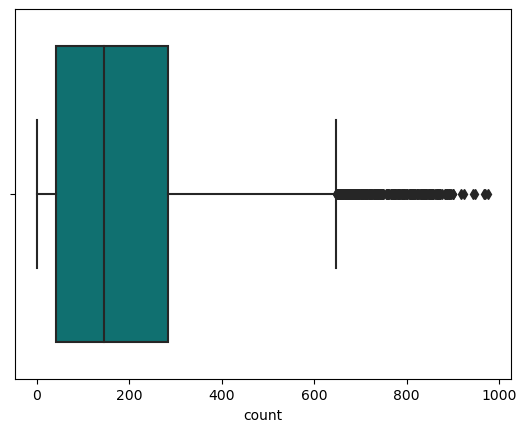

In [77]:
sns.boxplot(x=bike_df['count'],color='teal')

In [78]:
# Violin plot

<Axes: xlabel='count'>

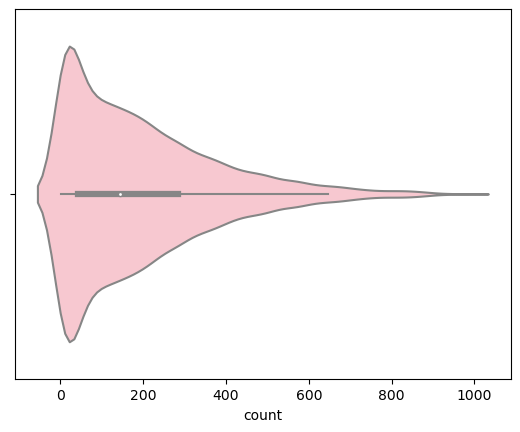

In [79]:
sns.violinplot(x=bike_df['count'],color='pink')

In [80]:
# Interquartile range (IQR)

In [81]:
Q1 = bike_df['count'].quantile(0.25)
Q2 = bike_df['count'].quantile(0.50)
Q3 = bike_df['count'].quantile(0.75)
print("Q1:",Q1, "\nQ2:",Q2, "\nQ3:",Q3)

Q1: 42.0 
Q2: 145.0 
Q3: 284.0


In [82]:
IQR = Q3-Q1
print("IQR : ", IQR)

IQR :  242.0


In [83]:
min_whisk = Q1 - (1.5*IQR)
max_whisk = Q3 + (1.5*IQR)
print('Minimum whisker : ', min_whisk , '\nMaximum whisker : ', max_whisk)

Minimum whisker :  -321.0 
Maximum whisker :  647.0


In [84]:
# Conclusion

- From the above observation, we can conclude that their is no outlier less than that of minimum whisker but their are many 
  outliers whose  value is greater than that of the maximum whiskers.

In [85]:
## Based on your anlysis either drop extreme values or substitute them with more acceptable value.

- As per observation, as their are many outlier values which caannot be neglected so we should substitute them with median of 
  the count.

In [86]:
median_count = bike_df['count'].median()
print('Median : ', median_count)
bike_df.loc[bike_df['count']>647,'count']=median_count
bike_df

Median :  145.0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Part III) D) Handling Categorical Values

In [87]:
# Two types of categorical values : ordinal and nominal

- In this case, only **season** column is **ordinal**, all others are **nominal** columns.

In [88]:
# Ordinal values

- As the **season** column already has values in order, so no need to map values on that column.

In [89]:
# Nominal values

In [90]:
# One-hot encoding

In [91]:
bike_df=pd.get_dummies(bike_df, columns=['weather'])

In [92]:
bike_df.head()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,9.84,14.395,81,0.0,3,13,16,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,9.02,13.635,80,0.0,8,32,40,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,9.02,13.635,80,0.0,5,27,32,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,9.84,14.395,75,0.0,3,10,13,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,9.84,14.395,75,0.0,0,1,1,True,False,False,False


In [93]:
bike_df.replace({False:0, True:1},inplace=True)
bike_df

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,15.58,19.695,50,26.0027,7,329,336,1,0,0,0
10882,2012-12-19 20:00:00,4,0,1,14.76,17.425,57,15.0013,10,231,241,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,13.94,15.910,61,15.0013,4,164,168,1,0,0,0
10884,2012-12-19 22:00:00,4,0,1,13.94,17.425,61,6.0032,12,117,129,1,0,0,0


- **Low cardinality** : season, holiday, workingday 
- **High cardinality** : temp, atemp, humidity, windspeed, casual, registered, count

In [94]:
# Applying frequency encoding on high cardinality columns

In [95]:
bike_df['count'].value_counts()

count
145    321
5      169
4      149
3      144
6      135
      ... 
625      1
575      1
639      1
630      1
636      1
Name: count, Length: 642, dtype: int64

In [96]:
bike_df['temp'].value_counts().head()

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: count, dtype: int64

- Similarly, we can get count of different values present in a specific column.
- We have performed one-hot encoding on weather column as it has low cardinality. 
- We can also perform target-mean encoding on columns having high cardinality.
- As it's difficult for machines to interpret string values, so in this process we try to convert string values into numeric    values

## Part III) E) Handling Numerical values

In [97]:
# Whether the data is symmetrical or not.

In [98]:
bike_df["count"].skew()

0.9432312603080389

- The data of count column is assymetrical because the skew value is greater than that of 0.5.

In [99]:
# Plot histogram plot.

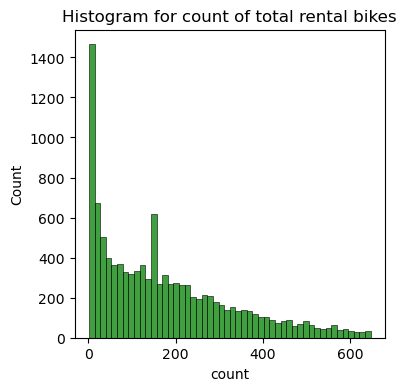

In [100]:
plt.figure(figsize=(4,4))
sns.histplot(bike_df['count'],bins=50,color='green')
plt.title('Histogram for count of total rental bikes')
plt.show()

In [101]:
# Plot distribution plot.

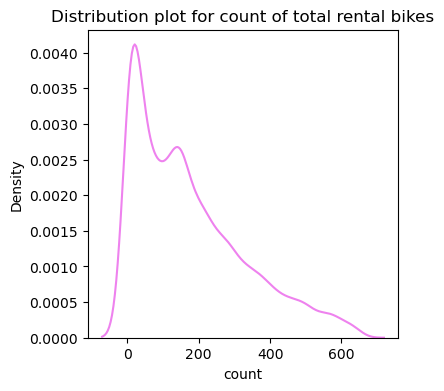

In [102]:
plt.figure(figsize=(4,4))
sns.kdeplot(bike_df['count'],color='violet')
plt.title('Distribution plot for count of total rental bikes')
plt.show()

In [103]:
## If your data is skewed and non-symmetrical apply min-max scaler.

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
bike_df[['count','casual']]=scaler.fit_transform(bike_df[['count', 'casual']])

In [105]:
# Confirm the distribution patter by Plot histogram and distribution plot again.

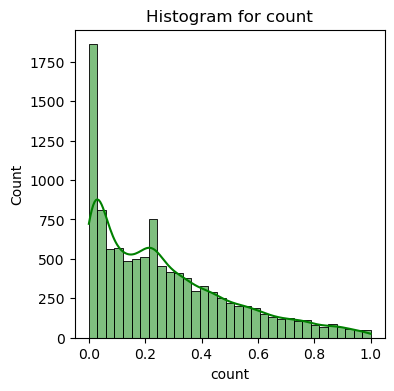

In [107]:
# Count
plt.figure(figsize=(4,4))
sns.histplot(x=bike_df['count'],kde=True, color='green')
plt.title('Histogram for count')
plt.show()

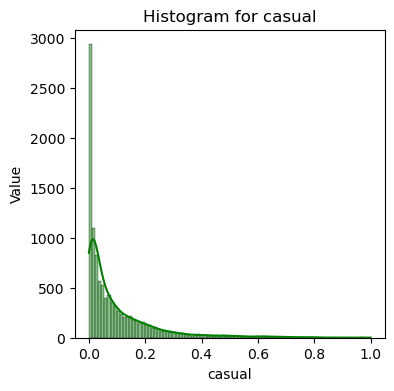

In [108]:
# Casual
plt.figure(figsize=(4,4))
sns.histplot(x=bike_df['casual'],kde=True, color='green')
plt.title('Histogram for casual')
plt.ylabel('Value')
plt.show()

In [106]:
# Conclusion

- From the above observation, we can say that **count** column is assymetrical as it's skew value is 0.9 which is not 
  between -0.5 to 0.5.